In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

In [2]:
method_names = ['ipr', 'nrm', 'Bella_logreg', 'Forman_logreg', 'Bella_RF', 'Forman_RF', 'Vaz'] 

In [25]:
def plot_two_plots(sim_scenario, pi_target, pi_target_name):
    df_list = []

    for m in method_names:
        df_tmp = pd.read_csv('results/'+sim_scenario+'/'+m+'_pi_target'+pi_target_name+'.csv')
        df_tmp['method'] = m
        df_list.append(df_tmp)
    
    df = pd.concat(df_list, ignore_index=True)
    df['method'] = pd.Categorical(df['method'], categories=method_names, ordered=True)

    df_var = df.groupby(['method', 'n_target'], observed=True).agg(var_emp=('pi', lambda x: np.var(x, ddof=1))).reset_index()
    df_merged = pd.merge(df, df_var, on=['n_target', 'method'], how='left')

    df_tmp1 = pd.read_csv('results/'+sim_scenario+'/'+'rbf'+'_pi_target'+pi_target_name+'.csv')
    df_tmp1['method'] = 'ipr'
    df_tmp2 = pd.read_csv('results/'+sim_scenario+'/'+'rbf'+'_pi_target'+pi_target_name+'.csv')
    df_tmp2['method'] = 'nrm'
    df_tmp1 = pd.concat([df_tmp1, df_tmp2], ignore_index=True)
    df_tmp1['method'] = pd.Categorical(df_tmp1['method'], categories=method_names, ordered=True)

    # df_tmp1 = pd.read_csv('results/'+sim_scenario+'/'+'rbf'+'_pi_target'+pi_target_name+'.csv')
    # df_tmp1['method'] = 'ipr'


    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(16, 5.5), sharex=False)

    flierprops = dict(marker='o', markersize=2, linestyle='none', markerfacecolor='darkgray')

    # --- Left plot ---
    sns.boxplot(ax=axes[0], data=df, x='n_target', y='pi', hue='method', flierprops=flierprops)
    axes[0].hlines(y=pi_target, xmin=-0.5, xmax=len(df['n_target'].unique())-0.5, linestyle='dotted', color='black')
    axes[0].set_title("Estimators")

    # --- Right plot ---
    sns.boxplot(ax=axes[1], data=df_merged, x='n_target', y='var_n', hue='method', boxprops={'alpha':0.5}, flierprops=flierprops)
    sns.stripplot(
        ax=axes[1],
        data=df_merged[['n_target', 'method', 'var_emp']].drop_duplicates(),
        x='n_target', y='var_emp', hue='method',
        dodge=True, size=6, marker="X", edgecolor='black', linewidth=1
    )
    sns.stripplot(
        ax=axes[1],
        data=df_tmp1[['n_target', 'method', 'var_n']],
        x='n_target', y='var_n', hue='method',
        dodge=True, size=6, marker="o", edgecolor='black', linewidth=1
    )
    axes[1].set_title("Variances")

    # Fix duplicate legends on right plot
    handles, labels = axes[1].get_legend_handles_labels()
    method_handles = handles[:len(df_merged['method'].unique())]
    method_labels = labels[:len(df_merged['method'].unique())]

    empirical_handle = Line2D(
        [0], [0], marker='X', color='w', label='Empirical variances',
        markerfacecolor='gray', markersize=6, markeredgecolor='black'
    )

    empirical_handle2 = Line2D(
        [0], [0], marker='o', color='w', label='True for Gaussian kernel',
        markerfacecolor='gray', markersize=6, markeredgecolor='black'
    )

    axes[1].legend(
        handles=method_handles + [empirical_handle] + [empirical_handle2],
        labels=method_labels + ['Empirical Variance'] + ['True for Gaussian kernel']
    )

    df_mse = df.groupby(['method', 'n_target'], observed=True).agg(mse=('pi', lambda x: np.mean((x - pi_target)**2))).reset_index()

    sns.barplot(ax=axes[2], data=df_mse, x='n_target', y='mse', hue='method')
    axes[2].set_title("MSE")

    fig.suptitle("Comparison of Estimators: "+sim_scenario+", pi_target="+str(pi_target), fontsize=16, weight='bold')

    plt.tight_layout()
    plt.show()

    # plt.figure(figsize=(12, 6))
    # sns.boxplot(df, x='n_target', y='pi', hue='method')
    # plt.hlines(y=0.7, xmin=0-0.5, xmax=6.5, color='black')
    # plt.show()

    
    # plt.figure(figsize=(12, 6))
    # sns.boxplot(df_merged, x='n_target', y='var_n', hue='method', boxprops={'alpha':0.5})
    # sns.stripplot(data=df_merged[['n_target', 'method', 'var_emp']].drop_duplicates(), x='n_target', y='var_emp', hue='method',
    #             dodge=True, size=8, marker="X", edgecolor='black', linewidth=1)
    # # Fix duplicate legends
    # handles, labels = plt.gca().get_legend_handles_labels()
    # # Only keep one set of method handles
    # method_handles = handles[:len(df_merged['method'].unique())]
    # method_labels = labels[:len(df_merged['method'].unique())]

    # # Add a custom handle for empirical variance
    # empirical_handle = Line2D([0], [0], marker='X', color='w', label='Empirical variances',
    #                         markerfacecolor='gray', markersize=8, markeredgecolor='black')

    # # Combine legends
    # plt.legend(handles=method_handles + [empirical_handle],
    #         labels=method_labels + ['Empirical Var'])
    # plt.show()


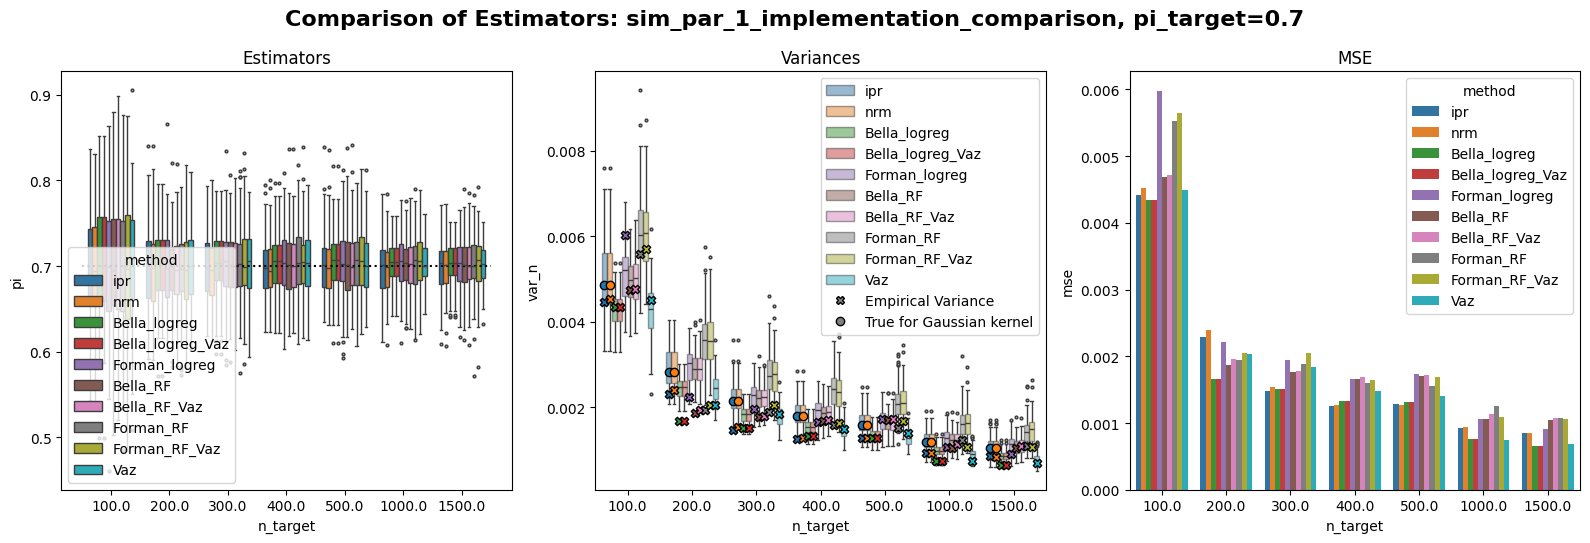

In [39]:
# method_names = ['ipr', 'nrm', 
#                 'Bella_logreg', 'Bella_logreg_Vaz', 'Forman_logreg', 'Forman_logreg_Vaz',
#                 'Bella_RF', 'Bella_RF_Vaz', 'Forman_RF', 'Forman_RF_Vaz',
#                 'Vaz'] 
method_names = ['ipr', 'nrm', 
                'Bella_logreg', 'Bella_logreg_Vaz', 'Forman_logreg', 
                'Bella_RF', 'Bella_RF_Vaz', 'Forman_RF', 'Forman_RF_Vaz',
                'Vaz'] 
plot_two_plots('sim_par_1_implementation_comparison', 0.7, '07')

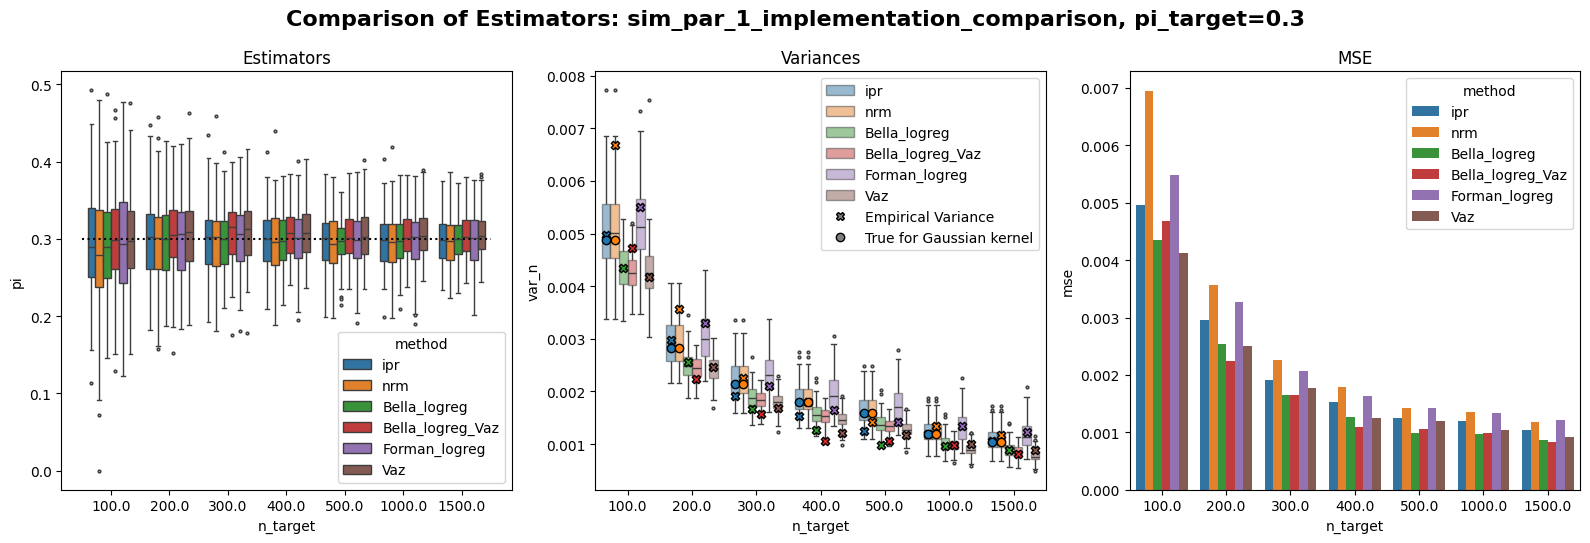

In [40]:
method_names = ['ipr', 'nrm', 
                'Bella_logreg', 'Bella_logreg_Vaz', 'Forman_logreg', 
                'Vaz'] 
plot_two_plots('sim_par_1_implementation_comparison', 0.3, '03')

In [27]:
# from generation import *
# r_n = 1/150 + 1/150 + 1/300
# generate_sample_Nstd_Nstd_CC_rbf(p=5, beta=1, n_plus=150, n_minus=150, n_target=300, pi_target=0.25, gamma=1/10)[0]*r_n

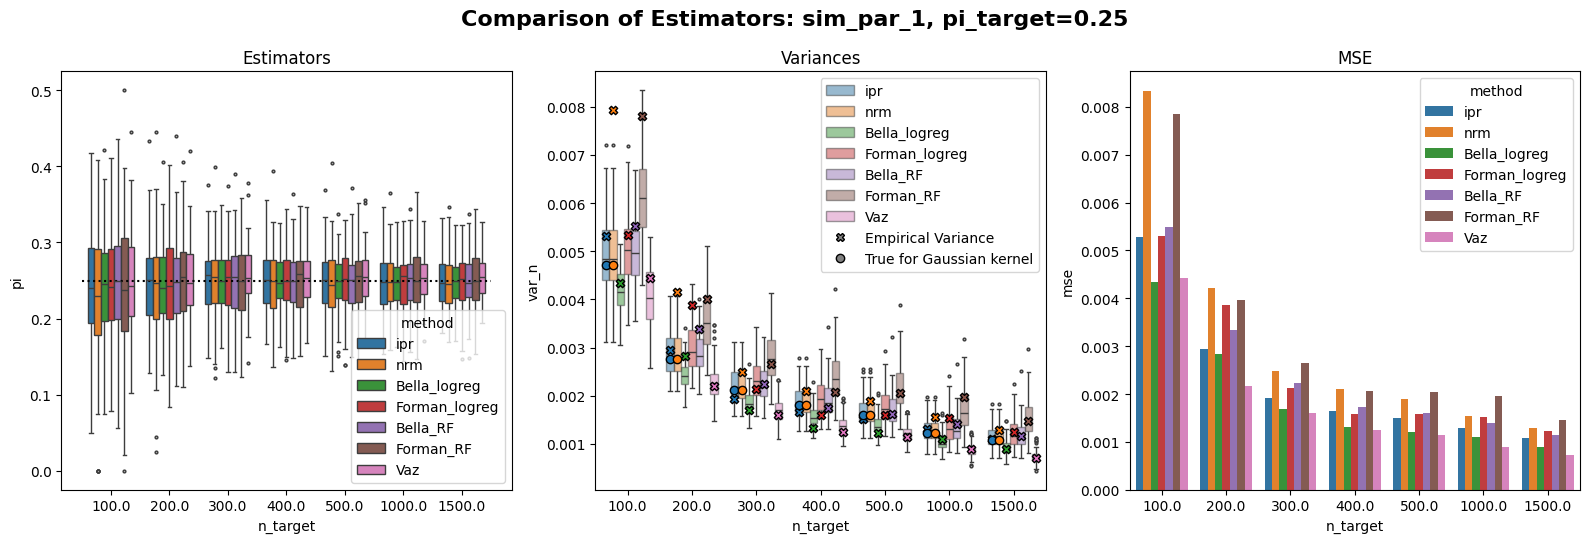

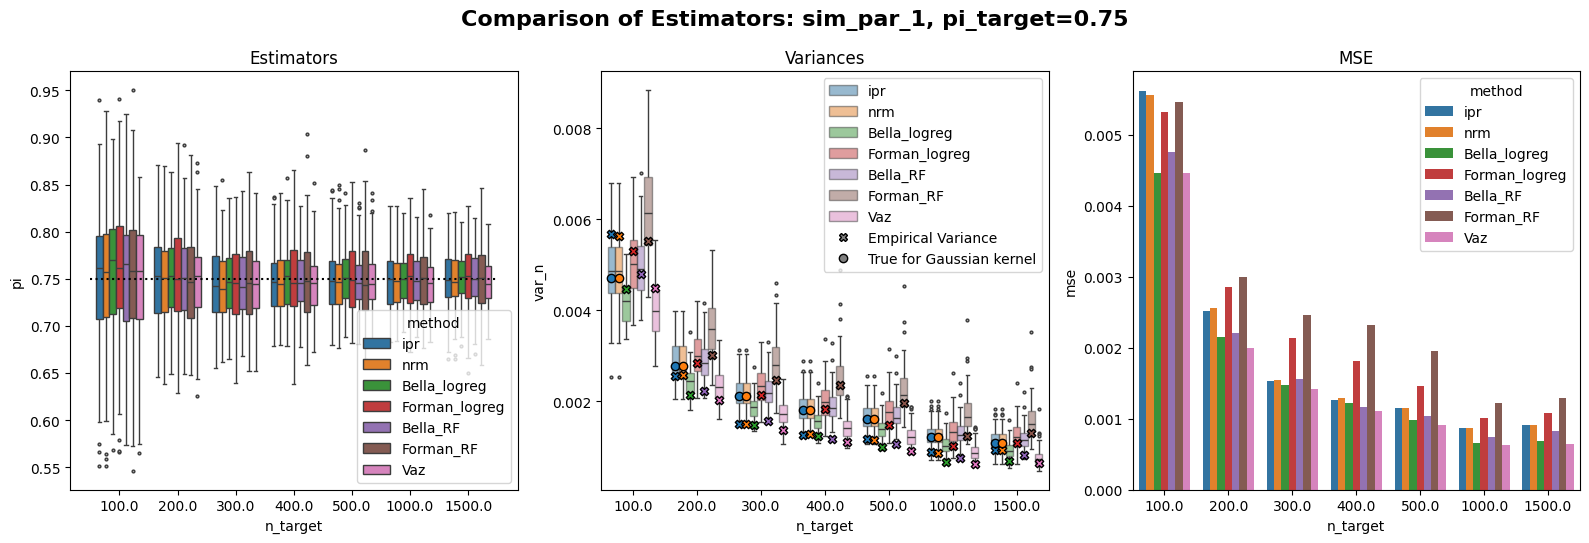

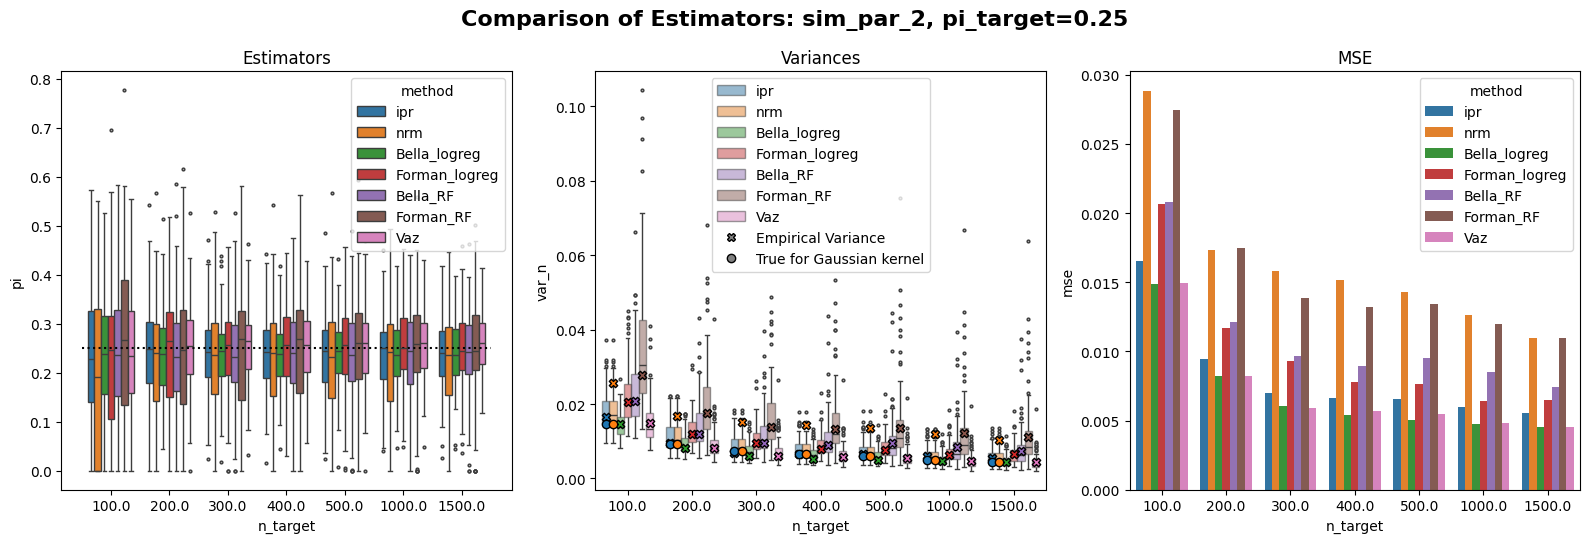

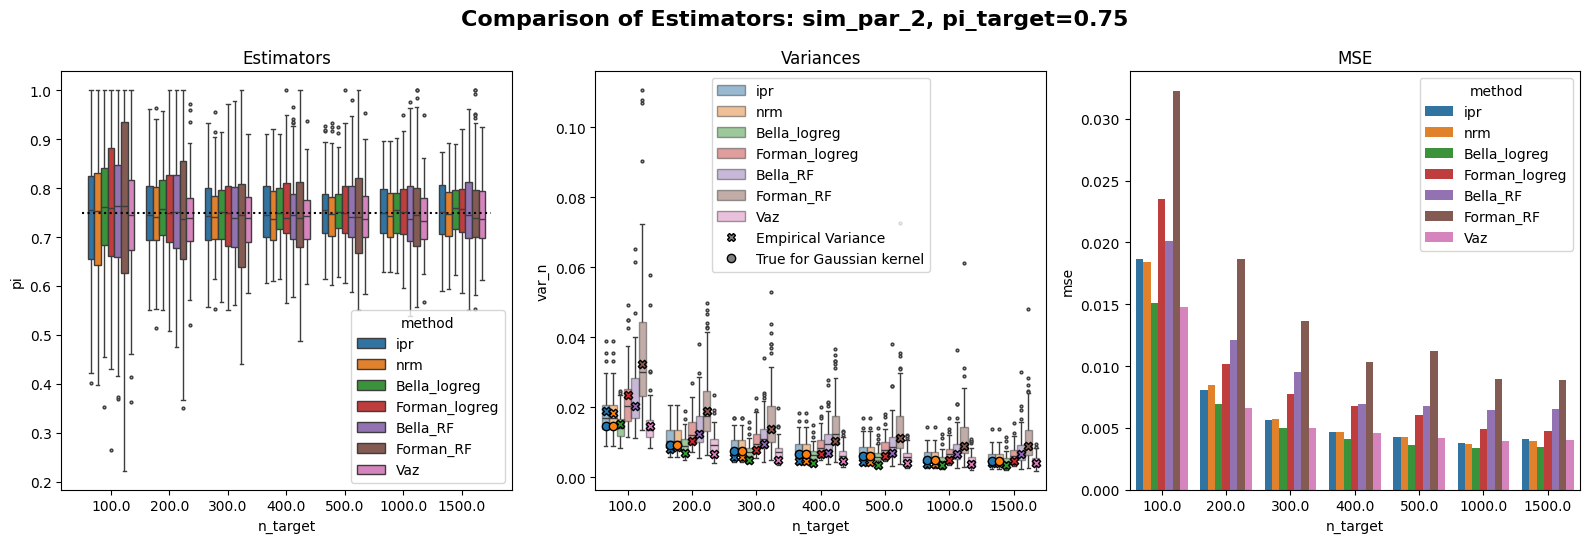

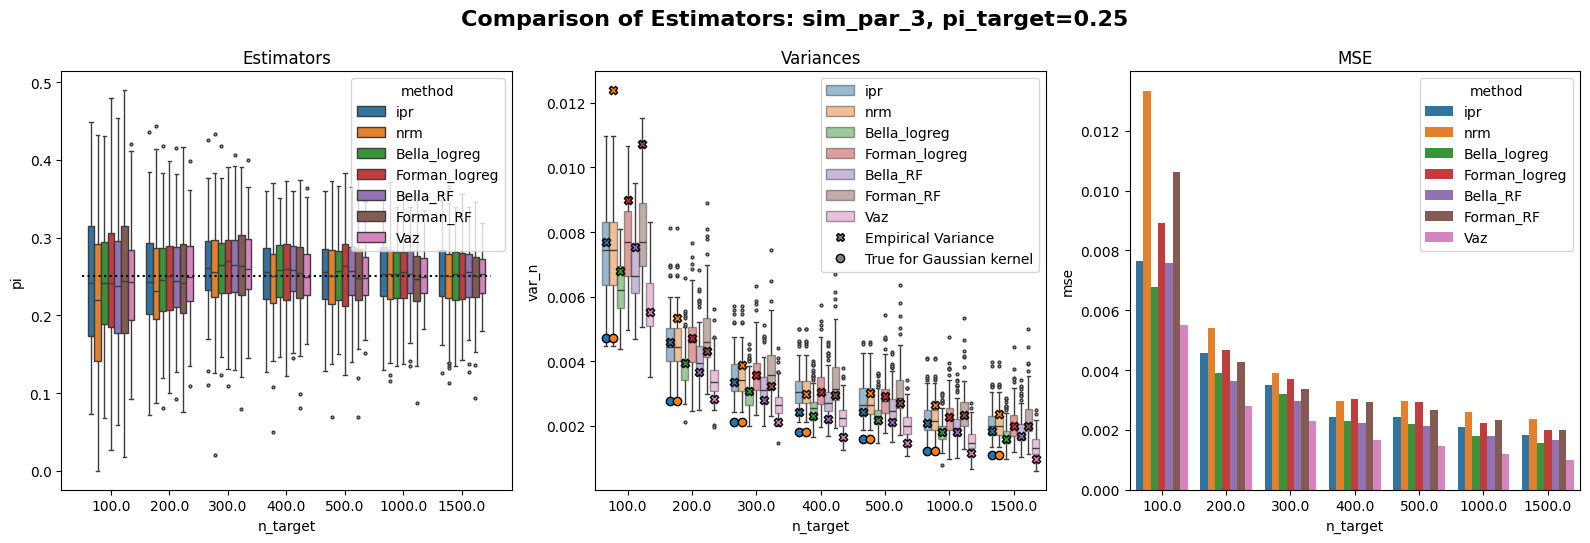

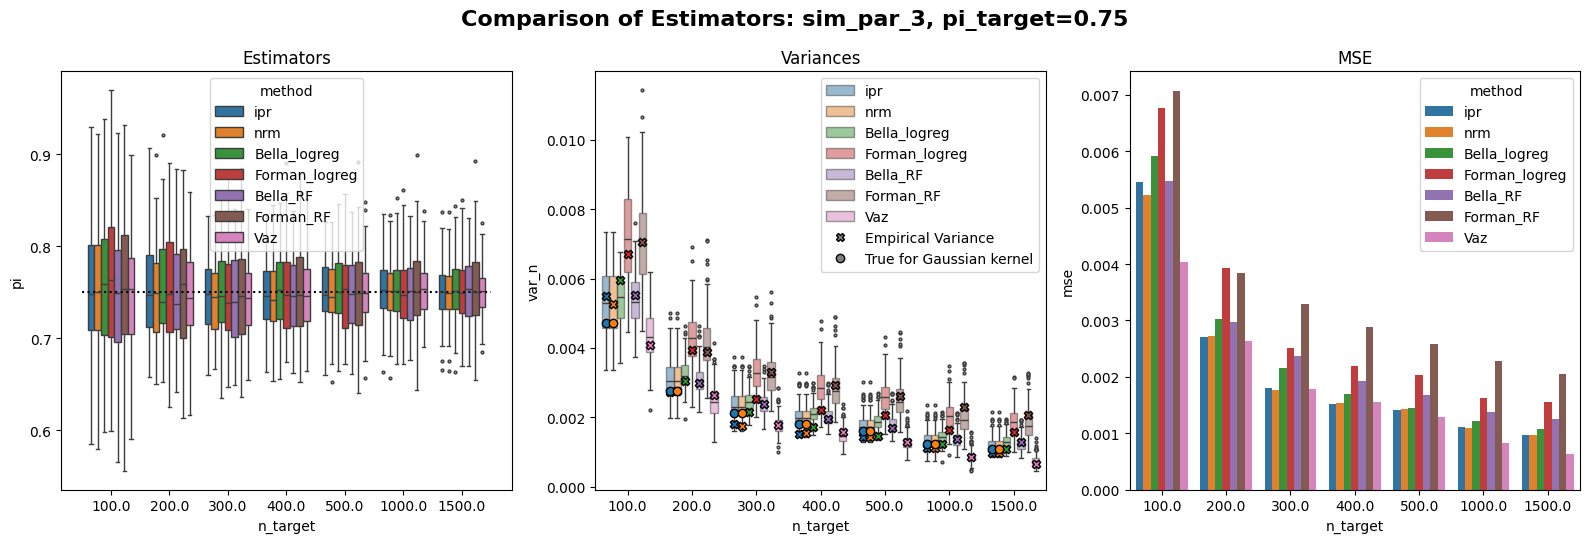

In [28]:
method_names = ['ipr', 'nrm', 'Bella_logreg', 'Forman_logreg', 'Bella_RF', 'Forman_RF', 'Vaz'] 

scen = ['sim_par_1','sim_par_1','sim_par_2','sim_par_2','sim_par_3','sim_par_3']
pi_targets = [0.25, 0.75,0.25, 0.75,0.25, 0.75]
pi_targets_names = ['025', '075','025', '075','025', '075']


for i in range(6):
    plot_two_plots(scen[i], pi_targets[i], pi_targets_names[i])

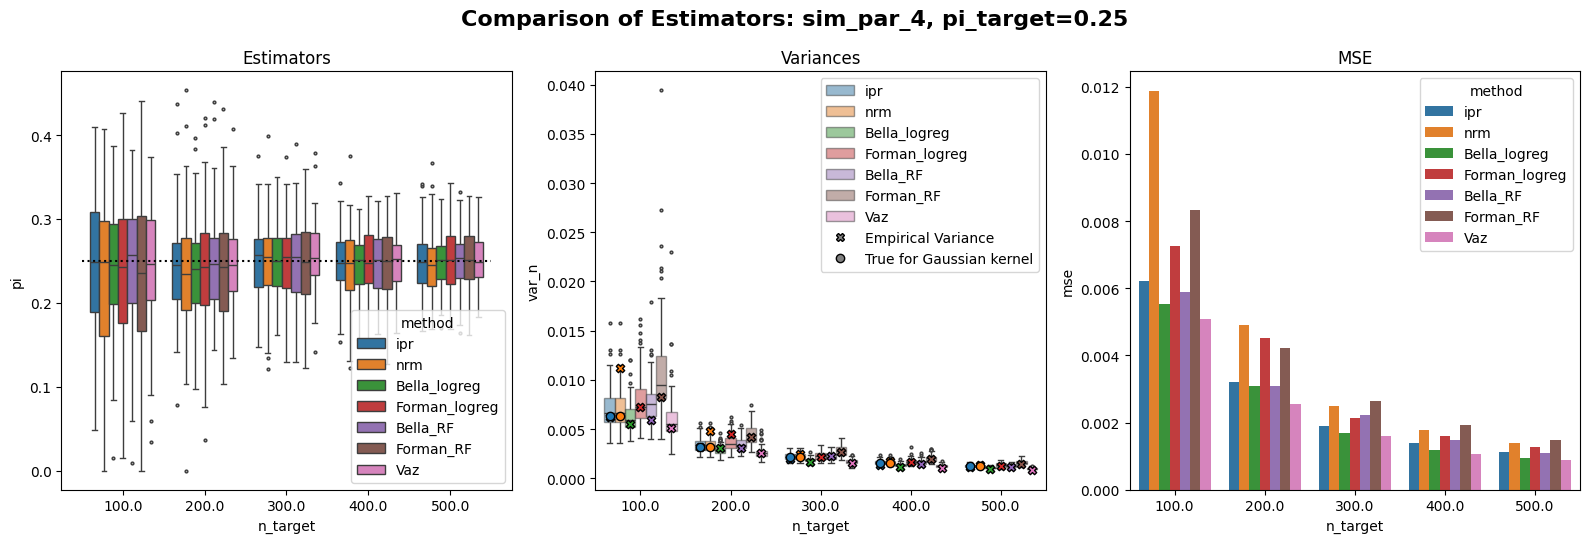

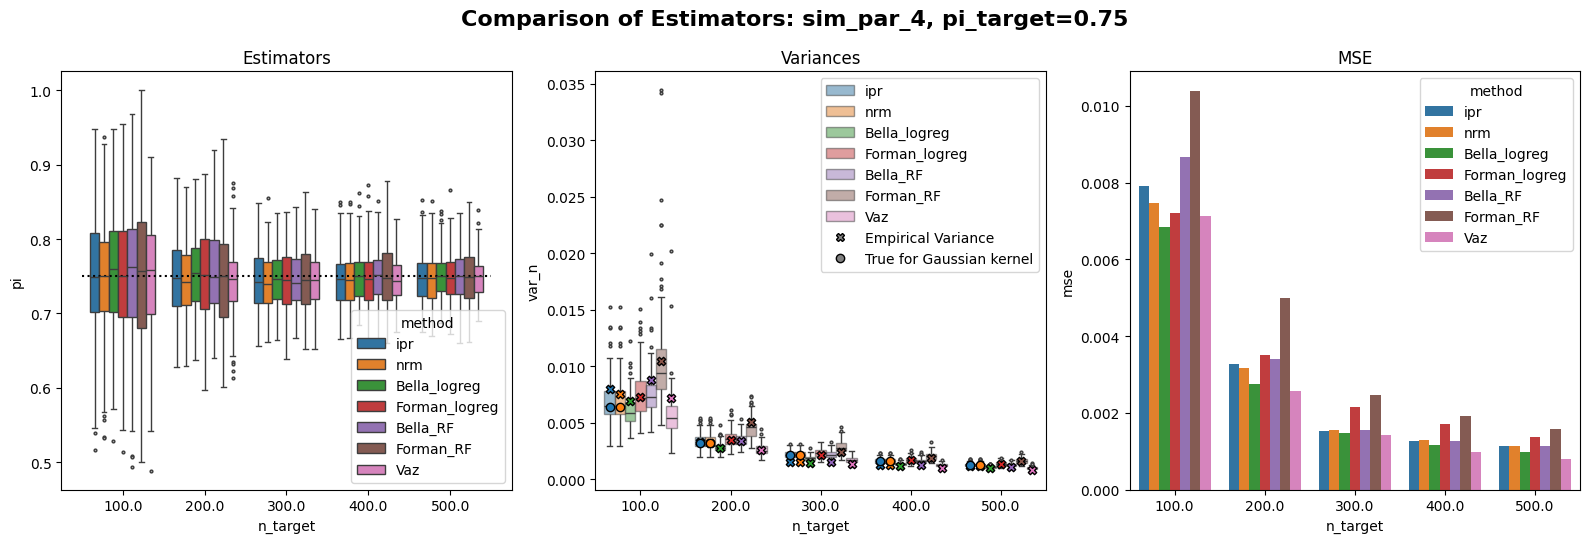

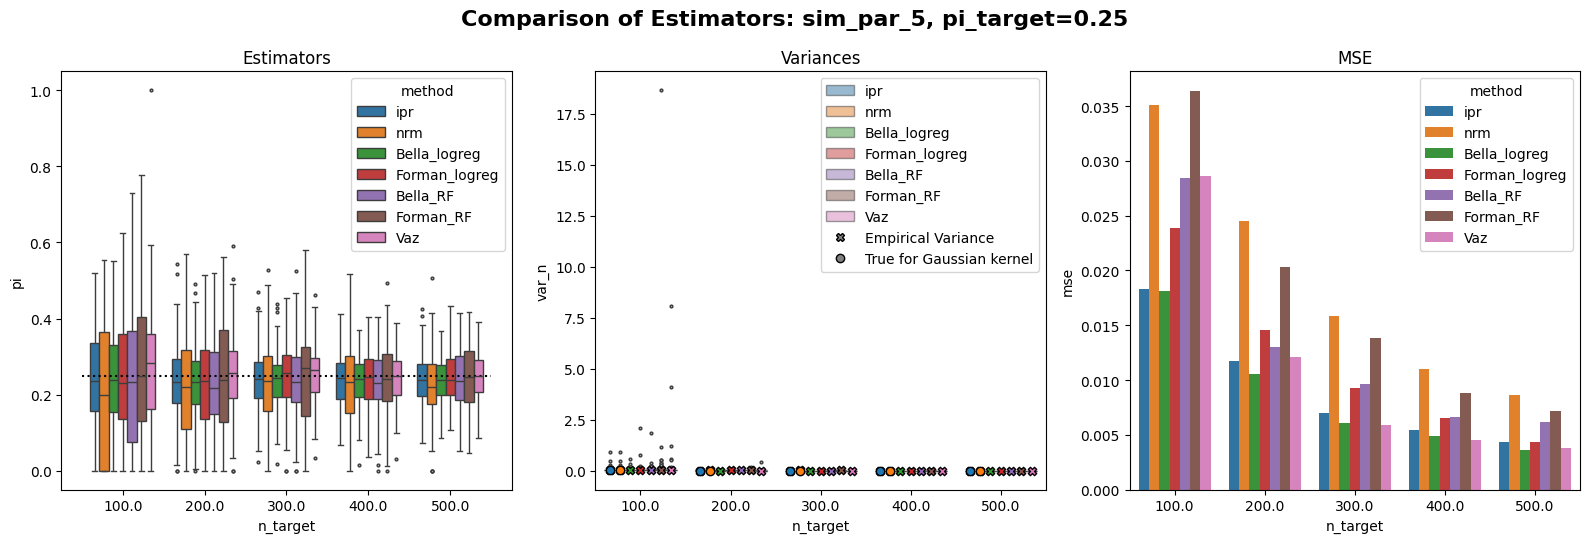

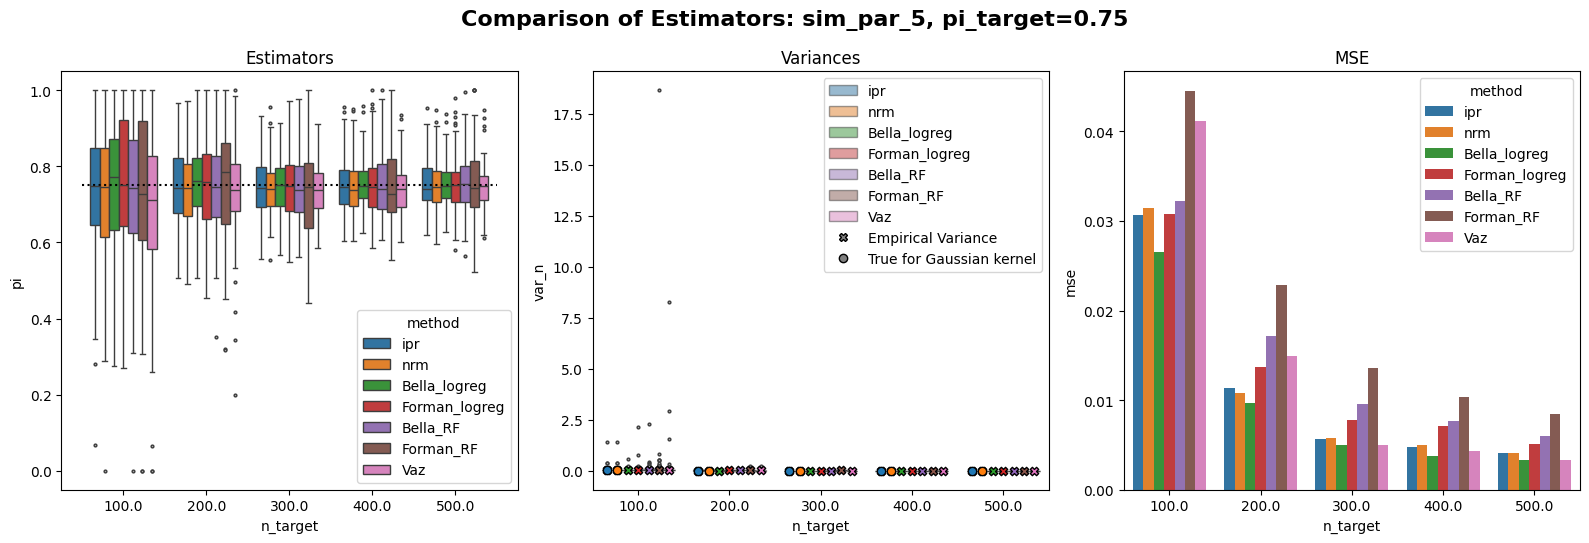

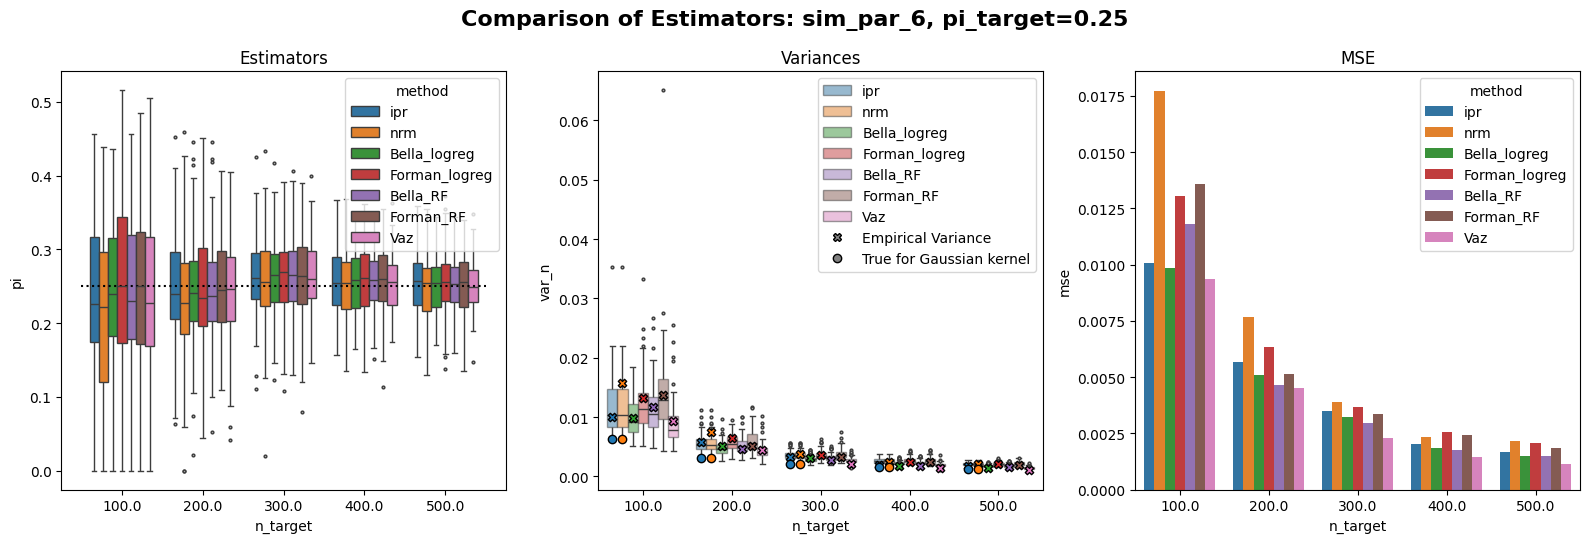

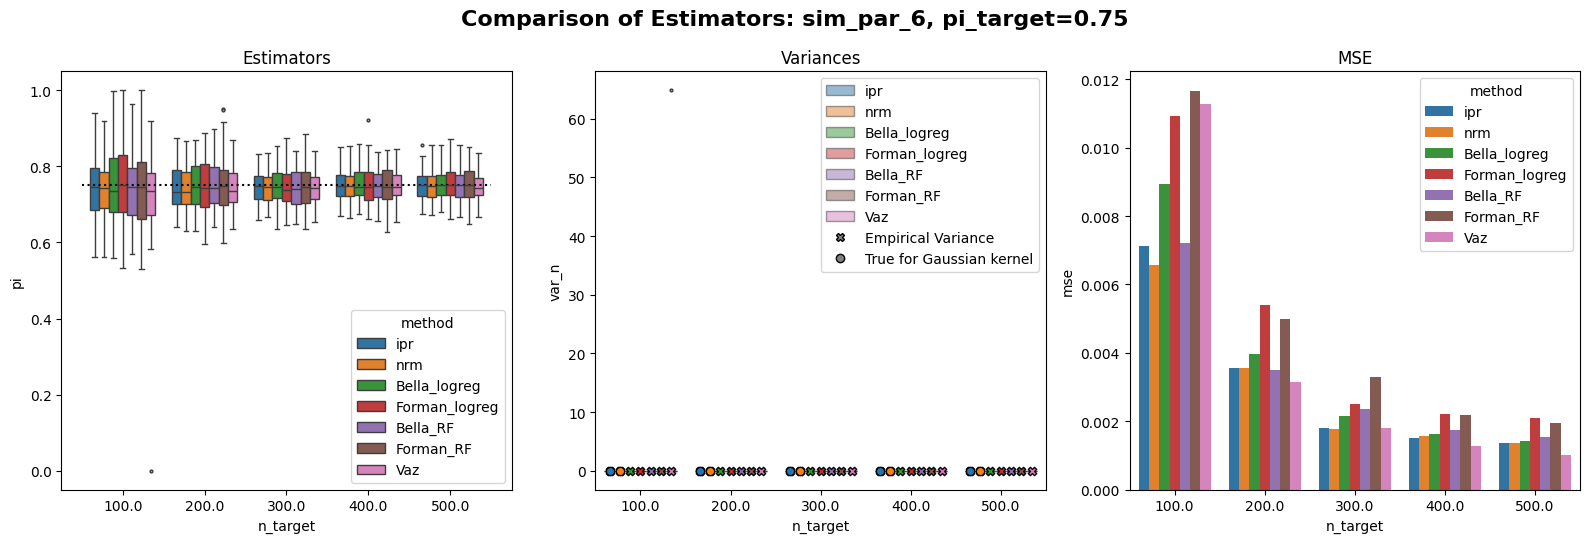

In [30]:
method_names = ['ipr', 'nrm', 'Bella_logreg', 'Forman_logreg', 'Bella_RF', 'Forman_RF', 'Vaz'] 
# method_names = ['ipr', 'nrm', 'Bella_logreg', 'Forman_logreg'] 

scen = ['sim_par_4','sim_par_4','sim_par_5','sim_par_5','sim_par_6','sim_par_6']
pi_targets = [0.25, 0.75,0.25, 0.75,0.25, 0.75]
pi_targets_names = ['025', '075','025', '075','025', '075']


for i in range(6):
    plot_two_plots(scen[i], pi_targets[i], pi_targets_names[i])